In [18]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import random

In [19]:
# Pilih titik asal dan tujuan
origin_point = (-0.05970195867789122, 109.34488290631464)  # UNTAN
destination_point = (-0.05669447177594062, 109.2944660907079)  # GOR Badminton Haruna Jaya

# Ambil graf jalan dari OpenStreetMap untuk Pontianak
G = ox.graph_from_place("Pontianak, Indonesia", network_type="drive")

# Temukan node terdekat untuk titik asal dan tujuan
orig_node = ox.distance.nearest_nodes(G, X=origin_point[1], Y=origin_point[0])
dest_node = ox.distance.nearest_nodes(G, X=destination_point[1], Y=destination_point[0])

In [20]:
# Rute terpendek dengan A*
shortest_route_astar = nx.astar_path(G, orig_node, dest_node, weight="length")

# Rute terpendek dengan Dijkstra
dijkstra_route = nx.shortest_path(G, orig_node, dest_node, weight="length", method="dijkstra")

# Fungsi untuk mendapatkan nama-nama jalan yang dilewati
def streetName(route, graph):
    street_names = []
    for u, v in zip(route[:-1], route[1:]):
        edge_data = graph.get_edge_data(u, v)
        if edge_data:
            name = edge_data[0].get("name", "Jalan Tanpa Nama")
            if name not in street_names:
                street_names.append(name)
    return street_names

Rute Awal (A*)


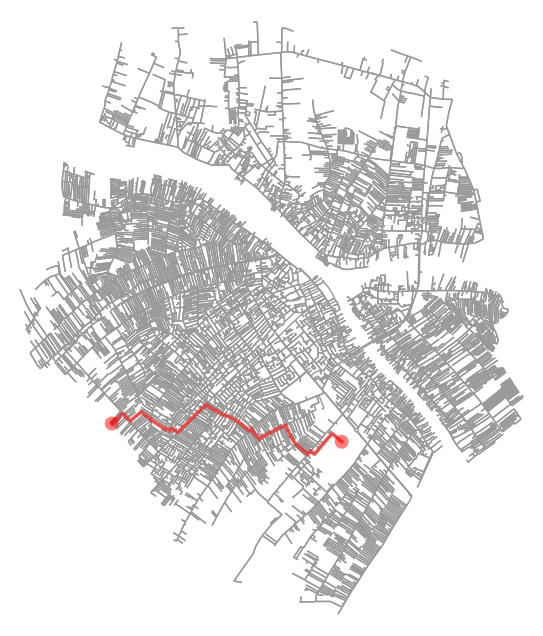

Nama Jalan yang Dilewati (A*): ['Gang Mufakat', 'Jalan Perdana', 'Gang Ikhlas', 'Gang Karya Baru 6', 'Jalan Karya Baru', 'Gang Karya Tani', 'Jalan Tanpa Nama', 'Gang Purnama Agung VI', 'Jalan Purnama', 'Jalan Perintis', 'Gang Baru', 'Jalan Mohammad Yamin', 'Gang Usaha Baru I', 'Gang Sederhana Pontianak', 'Gang Wonorejo', 'Jalan Danau Sentarum', 'Jalan Ampera']
Rute Awal (Dijkstra)


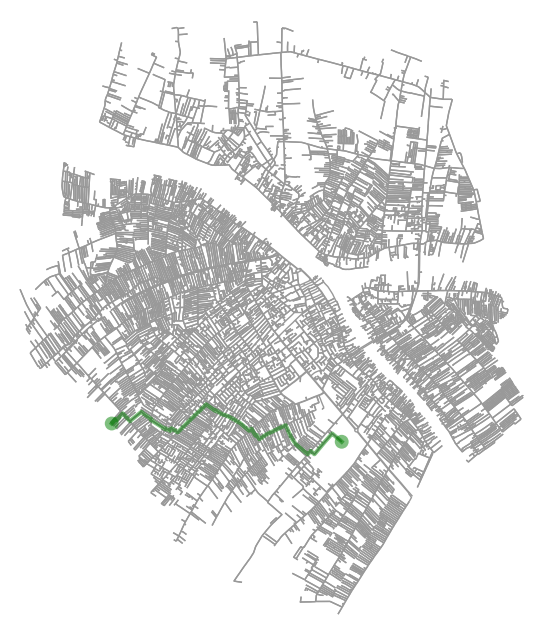

Nama Jalan yang Dilewati (Dijkstra): ['Gang Mufakat', 'Jalan Perdana', 'Gang Ikhlas', 'Gang Karya Baru 6', 'Jalan Karya Baru', 'Gang Karya Tani', 'Jalan Tanpa Nama', 'Gang Purnama Agung VI', 'Jalan Purnama', 'Jalan Perintis', 'Gang Baru', 'Jalan Mohammad Yamin', 'Gang Usaha Baru I', 'Gang Sederhana Pontianak', 'Gang Wonorejo', 'Jalan Danau Sentarum', 'Jalan Ampera']


In [21]:
# Tampilkan rute awal A*
print("Rute Awal (A*)")
fig, ax = ox.plot_graph_route(
    G,
    route=shortest_route_astar,
    route_color="red",
    route_linewidth=3,
    node_size=0,
    bgcolor="white",
    show=True
)
print("Nama Jalan yang Dilewati (A*):", streetName(shortest_route_astar, G))

# Tampilkan rute awal Dijkstra
print("Rute Awal (Dijkstra)")
fig, ax = ox.plot_graph_route(
    G,
    route=dijkstra_route,
    route_color="green",
    route_linewidth=3,
    node_size=0,
    bgcolor="white",
    show=True
)
print("Nama Jalan yang Dilewati (Dijkstra):", streetName(dijkstra_route, G))

In [22]:
# Tentukan ruas jalan yang diblokir
blocked_edges = [
    (shortest_route_astar[i], shortest_route_astar[i + 1]) 
    for i in random.sample(range(1, len(shortest_route_astar) - 2), 3) 
]

# Tentukan ruas jalan yang mengalami kemacetan
congested_edges = [
    (shortest_route_astar[i], shortest_route_astar[i + 1]) 
    for i in random.sample(range(1, len(shortest_route_astar) - 2), 4) 
]

G_blocked = G.copy()
G_blocked.remove_edges_from(blocked_edges)  # Hapus ruas yang diblokir

# Modifikasi bobot jalan untuk ruas yang macet
for u, v, data in G_blocked.edges(data=True):
    if (u, v) in congested_edges:
        data["length"] *= 3 

Rute Alternatif (A*)


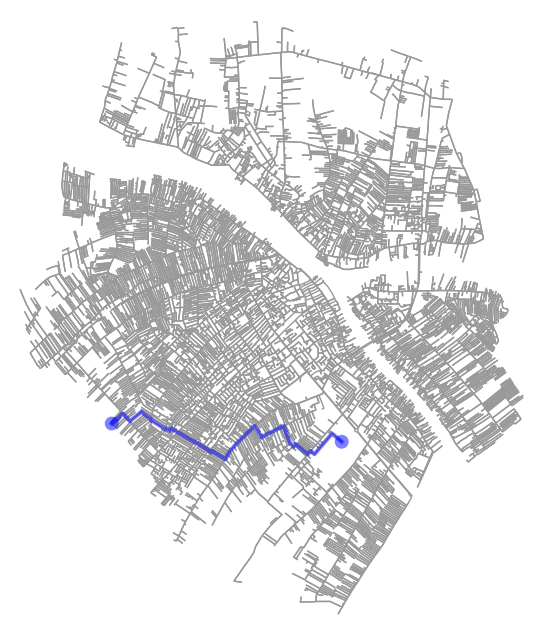

Nama Jalan yang Dilewati Setelah Hambatan (A*): ['Gang Mufakat', 'Jalan Perdana', 'Gang Ikhlas', 'Gang Karya Baru 6', 'Gang Karya Baru 7', 'Jalan Karya Baru', ['Purnama Agung 5', 'Purnama Agung V'], 'Jalan Purnama', 'Gang Punama Indah 1', 'Jalan Tanpa Nama', 'Gang Purnma Indah 2', 'Gang Tata Kota', 'Gang Sumber Agung 1 Dalam', 'Jalan Kesehatan', 'Gang Usaha Bersama 1', 'Gang Usaha Baru I', 'Gang Sederhana Pontianak', 'Gang Wonorejo', 'Jalan Danau Sentarum', 'Jalan Ampera']
Rute Alternatif (Dijkstra)


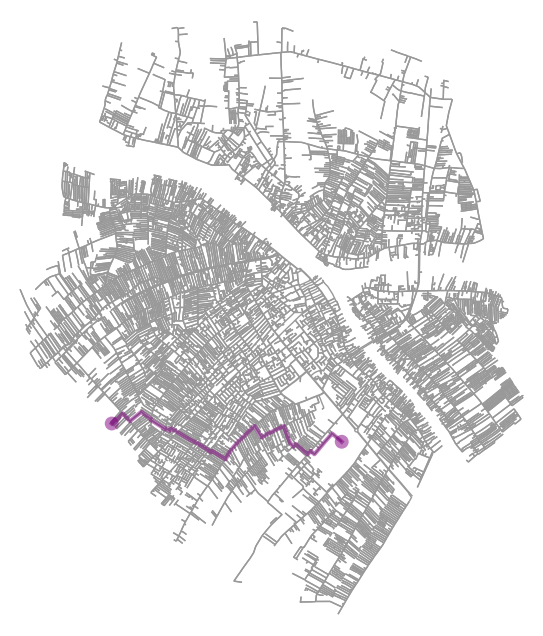

Nama Jalan yang Dilewati Setelah Hambatan (Dijkstra): ['Gang Mufakat', 'Jalan Perdana', 'Gang Ikhlas', 'Gang Karya Baru 6', 'Gang Karya Baru 7', 'Jalan Karya Baru', ['Purnama Agung 5', 'Purnama Agung V'], 'Jalan Purnama', 'Gang Punama Indah 1', 'Jalan Tanpa Nama', 'Gang Purnma Indah 2', 'Gang Tata Kota', 'Gang Sumber Agung 1 Dalam', 'Jalan Kesehatan', 'Gang Usaha Bersama 1', 'Gang Usaha Baru I', 'Gang Sederhana Pontianak', 'Gang Wonorejo', 'Jalan Danau Sentarum', 'Jalan Ampera']


In [23]:
# Cari rute alternatif setelah pemblokiran dan kemacetan
try:
    alternative_route_astar = nx.astar_path(G_blocked, orig_node, dest_node, weight="length")
    alternative_route_dijkstra = nx.shortest_path(G_blocked, orig_node, dest_node, weight="length", method="dijkstra")

    # Tampilkan rute baru A*
    print("Rute Alternatif (A*)")
    fig, ax = ox.plot_graph_route(
        G,
        route=alternative_route_astar,
        route_color="blue",
        route_linewidth=3,
        node_size=0,
        bgcolor="white",
        show=True
    )
    print("Nama Jalan yang Dilewati Setelah Hambatan (A*):", streetName(alternative_route_astar, G_blocked))

    # Tampilkan rute baru Dijkstra
    print("Rute Alternatif (Dijkstra)")
    fig, ax = ox.plot_graph_route(
        G,
        route=alternative_route_dijkstra,
        route_color="purple",
        route_linewidth=3,
        node_size=0,
        bgcolor="white",
        show=True
    )
    print("Nama Jalan yang Dilewati Setelah Hambatan (Dijkstra):", streetName(alternative_route_dijkstra, G_blocked))

except nx.NetworkXNoPath:
    print("Tidak ada rute alternatif yang tersedia setelah pemblokiran jalan.")